# Влияние ошибок округления на решение СЛАУ. Числа обусловленности.

In [60]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from scipy.linalg import hilbert

In [61]:
m1 = np.matrix('-400.60 199.80; 1198.80 -600.40')  # Первый вариант матрицы из методички Пакулиной

m2 = np.matrix(hilbert(2))  # Матрица Гильберта второго порядка

m3 = np.matrix(hilbert(5))  # Матрица Гильберта пятого порядка

In [62]:
def norm(matrix):  # Спектральная норма матрицы
    return np.linalg.norm(x=matrix, ord=2)


def det(matrix):  # Определитель матрицы
    return np.linalg.det(matrix)

In [78]:
def cond1(matrix):  # Спектральный критерий обусловленности
    return norm(matrix) * norm(matrix.getI())


def cond2(matrix):  # Критерий Ортеги
    res = 1
    for n in range(matrix.shape[0]):
        sum_ = 0
        for m in range(matrix.shape[0]):
            sum_ += matrix[n, m]**2
        res *= np.sqrt(sum_)
    return res/det(matrix)


def cond3(matrix):  # Угловой критерий
    res = 0
    inv_matrix = matrix.getI()
    for i in range(matrix.shape[0]):
        a = norm(matrix[i, :]) * norm(inv_matrix[:, i])
        if a > res:
            res = a
    return res

In [79]:
def randomx(n):  # Генерирует вектор-столбец x из отрезка [0, 1] 
    return(np.matrix(np.random.rand(n, 1)))


def constx(n):  # Возвращает вектор-столбец из единиц
    return np.matrix(("1;"*n)[:-1])

In [104]:
def computation(m, x):
    def variation(n):
        nonlocal m, b, x, conds, errors
        varm = m + n
        varb = b + n
        varx = varm.getI() * varb
        conds.append((cond1(varm), cond2(varm), cond3(varm)))
        errors.append((norm(varx - x)))
        print(f'n = {n}\nСпектральный критерий: {conds[-1][0]}\nКритерий Ортеги: {conds[-1][1]}\nУгловой критерий: {conds[-1][2]}\nМодуль невязки x: {errors[-1]}')
    b = m * x
    conds = []
    errors = []
    print("Ax = b")
    print("A =\n", m)
    print("x =\n", x)
    print("b =\n", b)
    variation(0)
    for i in range(-10, -1, 2):  # Варьируем матрицы
        variation(10**i)
    for j in range(3):  # Выводим график зависиости погрешности от числа обусловленности
        sn.scatterplot(x=([i[j] for i in conds]), y=(errors))
        plt.xlabel(f"Число обусловленности {j+1}")
        plt.ylabel("Погрешность решения x")
        plt.show()
        print(f"Зависимость между величиной {j+1}-го числа обусловленности и погрешностью решения(коэффициент пирсона):",
              np.corrcoef([i[j] for i in conds], errors)[0][1])

Ax = b
A =
 [[0.06164572 0.35393494 0.12684493 0.74893682 0.68366864]
 [0.82858087 0.32802305 0.79130854 0.34603105 0.6539508 ]
 [0.38255738 0.7209738  0.41337705 0.28580773 0.32483238]
 [0.67023152 0.49724092 0.29873455 0.45408951 0.46885217]
 [0.47857576 0.19926187 0.47676201 0.99437324 0.88174234]]
x =
 [[0.77614399]
 [0.43365681]
 [0.12960766]
 [0.36298406]
 [0.32743328]]
b =
 [[0.71348031]
 [1.22763614]
 [0.87325622]
 [1.09289142]
 [1.16930039]]
n = 0
Спектральный критерий: 26.778385813915985
Критерий Ортеги: -0.010601713628691656
Угловой критерий: 9.250366813153226
Модуль невязки x: 2.2644195468014703e-15
n = 1e-10
Спектральный критерий: 26.7783858194222
Критерий Ортеги: -0.010601713621602525
Угловой критерий: 9.250366814587677
Модуль невязки x: 1.7956946387745343e-10
n = 1e-08
Спектральный критерий: 26.77838636453663
Критерий Ортеги: -0.010601712919779242
Угловой критерий: 9.25036695659758
Модуль невязки x: 1.795701550126424e-08
n = 1e-06
Спектральный критерий: 26.77844087598378

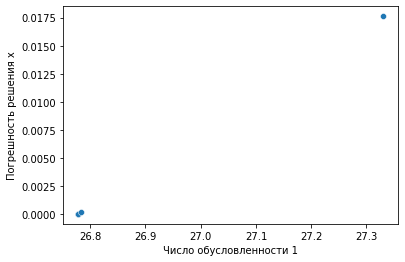

Зависимость между величиной 1-го числа обусловленности и погрешностью решения(коэффициент пирсона): 0.9999999819337538


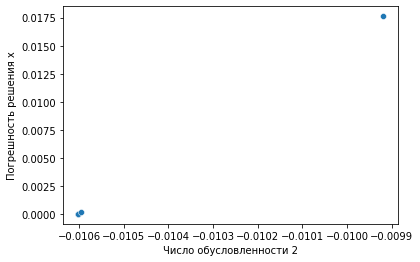

Зависимость между величиной 2-го числа обусловленности и погрешностью решения(коэффициент пирсона): 0.9999999783942545


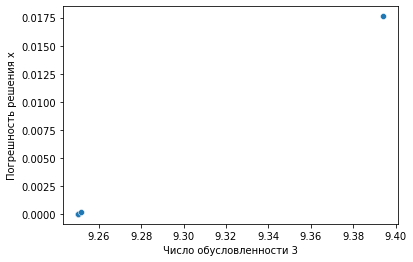

Зависимость между величиной 3-го числа обусловленности и погрешностью решения(коэффициент пирсона): 0.9999999820394633


In [105]:
test = np.matrix(np.random.rand(5, 5))  
# проверка зависимости погрешности решения от 
# чисел обусловленности на случайных матрицах
testx = randomx(5)

computation(test, testx)

Ax = b
A =
 [[-400.6  199.8]
 [1198.8 -600.4]]
x =
 [[0.91307357]
 [0.7551797 ]]
b =
 [[-214.89236769]
 [ 641.18270264]]
n = 0
Спектральный критерий: 1998.001499499904
Критерий Ортеги: 0.0016661112044730308
Угловой критерий: 600.2000330561891
Модуль невязки x: 7.434118367741181e-14
n = 1e-10
Спектральный критерий: 1998.0014999793434
Критерий Ортеги: 0.00166611120407341
Угловой критерий: 600.2000332001486
Модуль невязки x: 1.1948893743308413e-10
n = 1e-08
Спектральный критерий: 1998.0015474519066
Критерий Ортеги: 0.0016661111645041886
Угловой критерий: 600.2000474545682
Модуль невязки x: 1.1951089791169337e-08
n = 1e-06
Спектральный критерий: 1998.0062947134131
Критерий Ортеги: 0.0016661072075873837
Угловой критерий: 600.2014728980466
Модуль невязки x: 1.195111988364632e-06
n = 0.0001
Спектральный критерий: 1998.4811347932227
Критерий Ортеги: 0.0016657115158820995
Угловой критерий: 600.3440514550541
Модуль невязки x: 0.00011953958342872351
n = 0.01
Спектральный критерий: 2047.1324662947

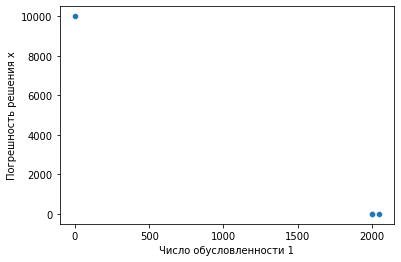

Зависимость между величиной 1-го числа обусловленности и погрешностью решения(коэффициент пирсона): -0.9997097004417076


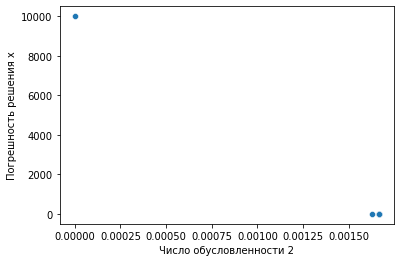

Зависимость между величиной 2-го числа обусловленности и погрешностью решения(коэффициент пирсона): -0.999719230513279


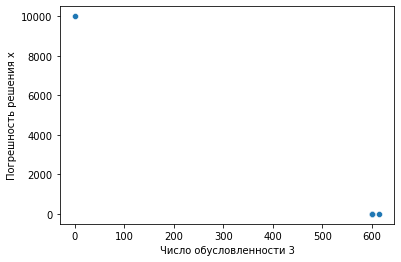

Зависимость между величиной 3-го числа обусловленности и погрешностью решения(коэффициент пирсона): -0.999709957625972


In [93]:
computation(m1, randomx(2))

Ax = b
A =
 [[-400.6  199.8]
 [1198.8 -600.4]]
x =
 [[1]
 [1]]
b =
 [[-200.8]
 [ 598.4]]
n = 0
Спектральный критерий: 1998.001499499904
Критерий Ортеги: 0.0016661112044730308
Угловой критерий: 600.2000330561891
Модуль невязки x: 3.1776437161565096e-14
n = 1e-10
Спектральный критерий: 1998.0014999793434
Критерий Ортеги: 0.00166611120407341
Угловой критерий: 600.2000332001486
Модуль невязки x: 1.7879330539948946e-10
n = 1e-08
Спектральный критерий: 1998.0015474519066
Критерий Ортеги: 0.0016661111645041886
Угловой критерий: 600.2000474545682
Модуль невязки x: 1.788403995779284e-08
n = 1e-06
Спектральный критерий: 1998.0062947134131
Критерий Ортеги: 0.0016661072075873837
Угловой критерий: 600.2014728980466
Модуль невязки x: 1.78841157155787e-06
n = 0.0001
Спектральный критерий: 1998.4811347932227
Критерий Ортеги: 0.0016657115158820995
Угловой критерий: 600.3440514550541
Модуль невязки x: 0.00017888364735609233
n = 0.01
Спектральный критерий: 2047.1324662947766
Критерий Ортеги: 0.0016261420

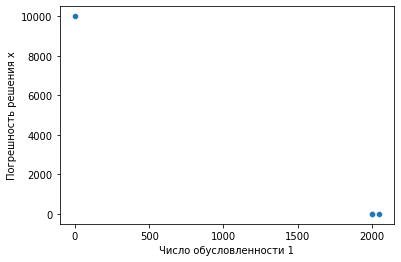

Зависимость между величиной 1-го числа обусловленности и погрешностью решения(коэффициент пирсона): -0.9997096860278907


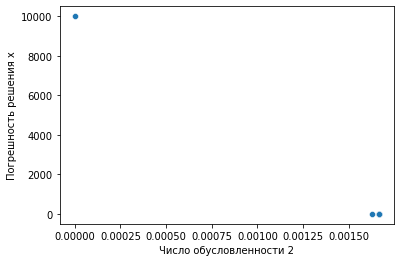

Зависимость между величиной 2-го числа обусловленности и погрешностью решения(коэффициент пирсона): -0.9997192446882089


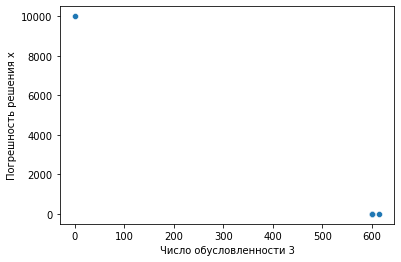

Зависимость между величиной 3-го числа обусловленности и погрешностью решения(коэффициент пирсона): -0.9997099432185405


In [94]:
computation(m1, constx(2))

Ax = b
A =
 [[1.         0.5       ]
 [0.5        0.33333333]]
x =
 [[0.19737974]
 [0.81222351]]
b =
 [[0.60349149]
 [0.36943104]]
n = 0
Спектральный критерий: 19.281470067903975
Критерий Ортеги: 0.12403473458920844
Угловой критерий: 8.062257748298553
Модуль невязки x: 8.95090418262362e-16
n = 1e-10
Спектральный критерий: 19.281470065764886
Критерий Ортеги: 0.12403473459531478
Угловой критерий: 8.062257747901642
Модуль невязки x: 6.073285500506398e-12
n = 1e-08
Спектральный критерий: 19.28146985399531
Критерий Ортеги: 0.12403473519984079
Угловой критерий: 8.06225770860745
Модуль невязки x: 6.07361796821748e-10
n = 1e-06
Спектральный критерий: 19.281448677167152
Критерий Ортеги: 0.12403479565188152
Угловой критерий: 8.062253779226756
Модуль невязки x: 6.073604117978219e-08
n = 0.0001
Спектральный критерий: 19.279332316613473
Критерий Ортеги: 0.12404083510840869
Угловой критерий: 8.061861234052676
Модуль невязки x: 6.071199966451398e-06
n = 0.01
Спектральный критерий: 19.080410739590366


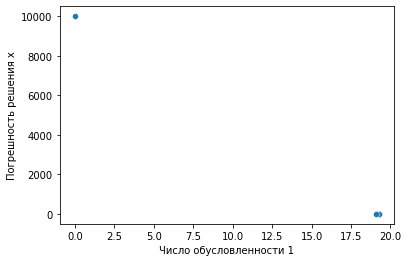

Зависимость между величиной 1-го числа обусловленности и погрешностью решения(коэффициент пирсона): -0.9999471833398746


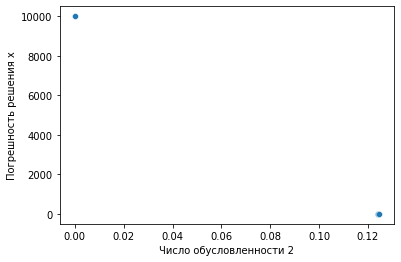

Зависимость между величиной 2-го числа обусловленности и погрешностью решения(коэффициент пирсона): -0.99999034595425


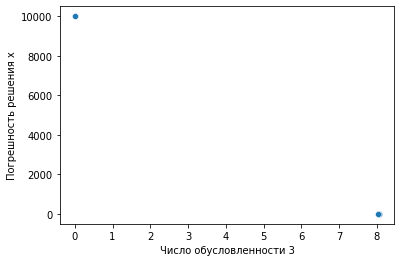

Зависимость между величиной 3-го числа обусловленности и погрешностью решения(коэффициент пирсона): -0.9999904035497905


In [95]:
computation(m2, randomx(2))

Ax = b
A =
 [[1.         0.5       ]
 [0.5        0.33333333]]
x =
 [[1]
 [1]]
b =
 [[1.5       ]
 [0.83333333]]
n = 0
Спектральный критерий: 19.281470067903975
Критерий Ортеги: 0.12403473458920844
Угловой критерий: 8.062257748298553
Модуль невязки x: 1.9860273225978185e-15
n = 1e-10
Спектральный критерий: 19.281470065764886
Критерий Ортеги: 0.12403473459531478
Угловой критерий: 8.062257747901642
Модуль невязки x: 6.324555843632812e-10
n = 1e-08
Спектральный критерий: 19.28146985399531
Критерий Ортеги: 0.12403473519984079
Угловой критерий: 8.06225770860745
Модуль невязки x: 6.324555141466119e-08
n = 1e-06
Спектральный критерий: 19.281448677167152
Критерий Ортеги: 0.12403479565188152
Угловой критерий: 8.062253779226756
Модуль невязки x: 6.324530021031351e-06
n = 0.0001
Спектральный критерий: 19.279332316613473
Критерий Ортеги: 0.12404083510840869
Угловой критерий: 8.061861234052676
Модуль невязки x: 0.0006322026509742172
n = 0.01
Спектральный критерий: 19.080410739590366
Критерий Ортеги

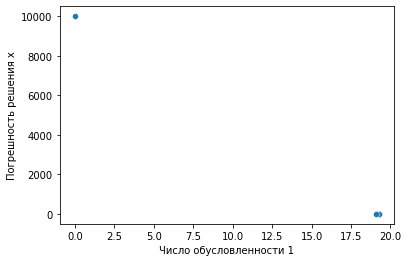

Зависимость между величиной 1-го числа обусловленности и погрешностью решения(коэффициент пирсона): -0.9999472442329674


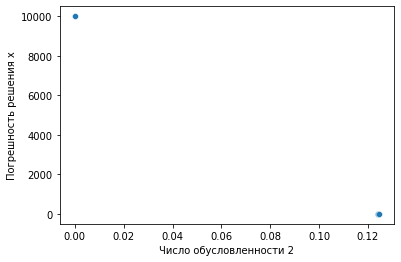

Зависимость между величиной 2-го числа обусловленности и погрешностью решения(коэффициент пирсона): -0.9999903198951229


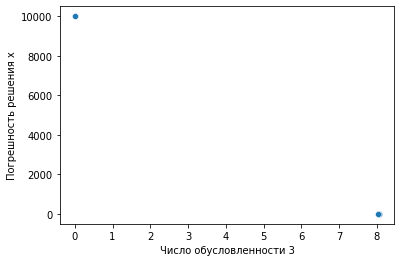

Зависимость между величиной 3-го числа обусловленности и погрешностью решения(коэффициент пирсона): -0.9999904294959965


In [96]:
computation(m2, constx(2))

Ax = b
A =
 [[1.         0.5        0.33333333 0.25       0.2       ]
 [0.5        0.33333333 0.25       0.2        0.16666667]
 [0.33333333 0.25       0.2        0.16666667 0.14285714]
 [0.25       0.2        0.16666667 0.14285714 0.125     ]
 [0.2        0.16666667 0.14285714 0.125      0.11111111]]
x =
 [[0.87462962]
 [0.25611987]
 [0.43954358]
 [0.21118456]
 [0.92570411]]
b =
 [[1.38714105]
 [0.82909493]
 [0.61092276]
 [0.48902088]
 [0.40965859]]
n = 0
Спектральный критерий: 476607.2502457645
Критерий Ортеги: 6.21669188792138e-11
Угловой критерий: 95157.69988994078
Модуль невязки x: 4.654028751089812e-11
n = 1e-10
Спектральный критерий: 476607.25004457176
Критерий Ортеги: 6.216691890800136e-11
Угловой критерий: 95157.69987473846
Модуль невязки x: 2.4518879571370023e-07
n = 1e-08
Спектральный критерий: 476607.2303772333
Критерий Ортеги: 6.216692172544868e-11
Угловой критерий: 95157.69841960885
Модуль невязки x: 2.4518275419235434e-05
n = 1e-06
Спектральный критерий: 476605.264140301

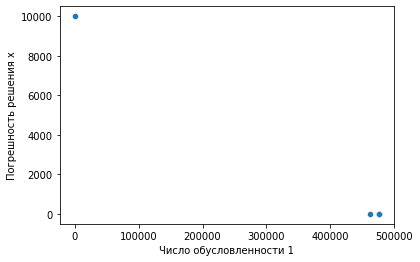

Зависимость между величиной 1-го числа обусловленности и погрешностью решения(коэффициент пирсона): -0.9996322406775584


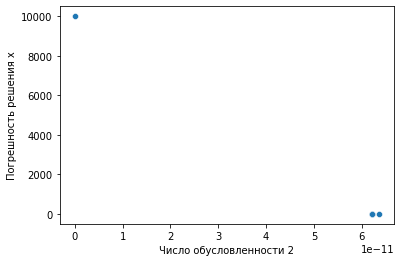

Зависимость между величиной 2-го числа обусловленности и погрешностью решения(коэффициент пирсона): -0.9996878639383391


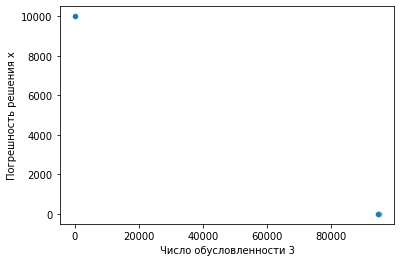

Зависимость между величиной 3-го числа обусловленности и погрешностью решения(коэффициент пирсона): -0.9999968243337684


In [97]:
computation(m3, randomx(5))

Ax = b
A =
 [[1.         0.5        0.33333333 0.25       0.2       ]
 [0.5        0.33333333 0.25       0.2        0.16666667]
 [0.33333333 0.25       0.2        0.16666667 0.14285714]
 [0.25       0.2        0.16666667 0.14285714 0.125     ]
 [0.2        0.16666667 0.14285714 0.125      0.11111111]]
x =
 [[1]
 [1]
 [1]
 [1]
 [1]]
b =
 [[2.28333333]
 [1.45      ]
 [1.09285714]
 [0.88452381]
 [0.74563492]]
n = 0
Спектральный критерий: 476607.2502457645
Критерий Ортеги: 6.21669188792138e-11
Угловой критерий: 95157.69988994078
Модуль невязки x: 9.236299953762211e-11
n = 1e-10
Спектральный критерий: 476607.25004457176
Критерий Ортеги: 6.216691890800136e-11
Угловой критерий: 95157.69987473846
Модуль невязки x: 5.74488233388825e-07
n = 1e-08
Спектральный критерий: 476607.2303772333
Критерий Ортеги: 6.216692172544868e-11
Угловой критерий: 95157.69841960885
Модуль невязки x: 5.744740971168512e-05
n = 1e-06
Спектральный критерий: 476605.2641403012
Критерий Ортеги: 6.216720339886896e-11
Угловой

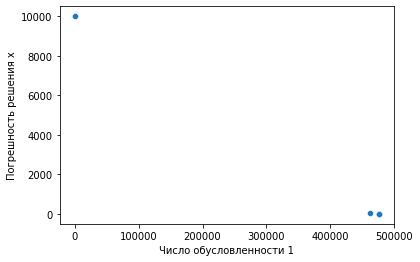

Зависимость между величиной 1-го числа обусловленности и погрешностью решения(коэффициент пирсона): -0.9996992206383237


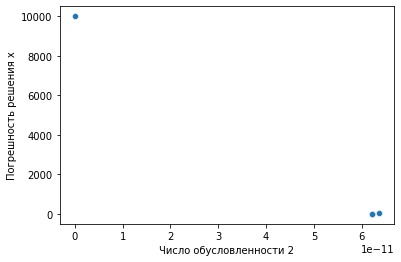

Зависимость между величиной 2-го числа обусловленности и погрешностью решения(коэффициент пирсона): -0.9996196954521789


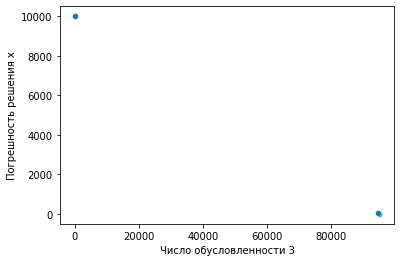

Зависимость между величиной 3-го числа обусловленности и погрешностью решения(коэффициент пирсона): -0.9999999928025802


In [98]:
computation(m3, constx(5))

In [101]:
x = [1, 2, 0]
y = [1, 2, 10000]
np.corrcoef(x, y)

array([[ 1.        , -0.86598209],
       [-0.86598209,  1.        ]])